# **PyTorch**

Library in Python for scientific computing. Two main goals are:

* Replace NumPy, as it is slow for GPUs
* Deep learning platform with high flexibility and speed

# Plan

* What is tensors 
* Linear regression with PyTorch
* Logistic regression with PyTorch

In [0]:
import numpy as np
import torch
from torch.autograd import Variable

## **Tensors**

Torch Tensors are like arrays in NumPy. But we can work with them in an efficient way with GPUs (Graphical processing units).


**Create a tensor**

Create an empty tensor 5 by 4 or tensor with random numbers.

In [0]:
x = torch.empty(5, 4)
print(x)

tensor([[1.7495e-35, 0.0000e+00, 1.6242e+26, 1.7255e+25],
        [1.1431e-39, 4.9665e-37, 4.8233e-42, 2.6123e-39],
        [3.2028e-21, 2.5353e+30, 2.3822e-44, 6.2582e-42],
        [1.6939e-39, 1.2811e-20, 6.1897e+26, 1.0141e+31],
        [2.8026e-45, 1.9722e-28, 1.4832e+25, 1.8959e+31]])


In [0]:
x = torch.rand(5, 3)
print(x)

tensor([[0.5944, 0.9430, 0.8125],
        [0.6073, 0.3208, 0.4245],
        [0.3411, 0.0684, 0.8362],
        [0.8611, 0.5145, 0.9722],
        [0.6365, 0.9334, 0.0121]])


Create tensor of zeros of type long:

In [0]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


Create tensor from array

In [0]:
y_numpy = np.random.rand(5, 3)
x = torch.tensor(y_numpy)
print(y_numpy)
print(x)

[[0.53774773 0.50300502 0.09950563]
 [0.9408021  0.18827231 0.19549546]
 [0.09966384 0.3776553  0.87172096]
 [0.75433904 0.50408076 0.45315739]
 [0.62329576 0.01947569 0.63674824]]
tensor([[0.5377, 0.5030, 0.0995],
        [0.9408, 0.1883, 0.1955],
        [0.0997, 0.3777, 0.8717],
        [0.7543, 0.5041, 0.4532],
        [0.6233, 0.0195, 0.6367]], dtype=torch.float64)


**Methods for tensors**

Create tensor and look what we can do with it

In [0]:
# torch.manual_seed(0)
x = torch.rand(3, 2)

In [0]:
x_size = x.size()
print(x_size)
print(x_size[0], x_size[1]) # immutable tuple is the return

torch.Size([3, 2])
3 2


In [0]:
y = torch.rand(3, 2)
print(x + y) # we can add matrices

tensor([[0.5964, 0.3504],
        [0.8827, 1.0112],
        [0.5774, 1.3228]])


In [0]:
print(torch.add(x, y)) # and we can add tensors (numpy has similar function)

tensor([[0.5964, 0.3504],
        [0.8827, 1.0112],
        [0.5774, 1.3228]])


In [0]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[0.5964, 0.3504],
        [0.8827, 1.0112],
        [0.5774, 1.3228]])


In [0]:
# a lot of other things are not covered
y.add_(x)
print(y)

tensor([[0.5964, 0.3504],
        [0.8827, 1.0112],
        [0.5774, 1.3228]])


In [0]:
# indexing is similar to numpy
print(x[:, 1])

tensor([0.2498, 0.3450, 0.7930])


In [0]:
# reshape is done by torch.view:

x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # size for the first position
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [0]:
# We can use __.item()__ to get value
# from tensor of size 1 by 1

x = torch.randn(1)
print(x)
print(x.item())

tensor([-1.2095])
-1.2095130681991577


More information about tensors is in documentation
https://pytorch.org/docs/stable/torch.html

## **Moving and transformation with pytorch.tensor()**

**To numpy and back**

In [0]:
a = torch.ones(4)
print(a)

tensor([1., 1., 1., 1.])


In [0]:
# to numpy array!
b = a.numpy()
print(b)

[1. 1. 1. 1.]


In [0]:
# objects are in the same region of memory
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2.])
[2. 2. 2. 2.]


In [0]:
# transformation works in other direction too
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


**Move back to CPU or to GPU**

In [0]:
# check if CUDA (GPU) is available
print(torch.cuda.is_available())

True


In [0]:
# now we can move tensors from memory of CPU to memory of GPU
x = torch.randn(4, 4)
device = torch.device("cuda:0")        # our CUDA device
y = torch.ones_like(x, device=device)  # create tensor at GPU
x = x.to(device)                       # move to GPU ``.to("cuda")``
z = x + y
print(z)
print(z.to("cpu", torch.double))       # ``.to`` allows type change

tensor([[-0.4273,  1.7402,  1.0496,  0.7226],
        [-0.5508,  0.3919,  0.3562,  1.3851],
        [ 2.0081,  0.6068, -0.6821,  0.8993],
        [ 2.2300,  1.6749,  0.8255,  0.6189]], device='cuda:0')
tensor([[-0.4273,  1.7402,  1.0496,  0.7226],
        [-0.5508,  0.3919,  0.3562,  1.3851],
        [ 2.0081,  0.6068, -0.6821,  0.8993],
        [ 2.2300,  1.6749,  0.8255,  0.6189]], dtype=torch.float64)


In [0]:
# why do we need GPU? It works faster!
# start with CPU tensor
x = torch.rand(5, 64)
y = torch.rand(64, 5000)
%timeit z = (x @ y).sum(dim=1)

# continue with GPU tensor
x, y = x.cuda(), y.cuda()
%timeit z = (x @ y).sum(dim=1)

# compare with numpy
x = np.random.random((5, 64))
y = np.random.random((64, 5000))
%timeit z = (x @ y).sum(axis=1)

The slowest run took 534.82 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 82.4 µs per loop
The slowest run took 261.14 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 21.1 µs per loop
The slowest run took 11.62 times longer than the fastest. This could mean that an intermediate result is being cached.
1000 loops, best of 3: 400 µs per loop


## **Automatic differentiation**

In [0]:
# we explicitly say with requires_grad, that we need gradients (partial derivative)
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [0]:
# we have a graph of links between variables
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [0]:
# we have explicit view of this function
print(y.grad_fn)

In [0]:
# the single number out is a function of x
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [0]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

# we can change requires_grad on the fly
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
None
True


**How to calculate derivatives**

In [0]:
# start with backward
out.backward()

In [0]:
# now we have partial derivatives of out with respect to x
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [0]:
x = torch.tensor([1., 2., 3.], requires_grad=True)

In [0]:
y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

z = x * 3
while z.data.norm() < 1000:
    z = z * 3

print(z)

tensor([ 512., 1024., 1536.], grad_fn=<MulBackward0>)
tensor([ 729., 1458., 2187.], grad_fn=<MulBackward0>)


In [0]:
w = torch.tensor([0.5, 1.0, 0.0001], dtype=torch.float)
z.backward(w)
print(x.grad)
x.grad = torch.zeros_like(x.grad)

v = torch.tensor([0.2, 1.0, 0.0001], dtype=torch.float)
y.backward(v)
print(x.grad)

tensor([3.6450e+02, 7.2900e+02, 7.2900e-02])
tensor([1.0240e+02, 5.1200e+02, 5.1200e-02])


In [0]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


## Linear regression with PyTorch

In [0]:
from sklearn import datasets, model_selection
import matplotlib.pyplot as plt

In [0]:
# Load common dataset available in sklearn. 
# For this model we'll try to use linear regression model
boston_data = datasets.load_boston()

# separate inputs and outputs
points = boston_data['data']
values = boston_data['target'].reshape(-1, 1)


# split the sample to training and test
training_points, test_points, training_values, test_values = model_selection.train_test_split(
    points, values, test_size=0.33, random_state=42)

In [0]:
# we create a class for linear regression. We inherit it from the baseclass torch.nn.Module
# we need two functions: 
# * __init__ identifies, how we create an object of a class
# * forward identifies, how we predict the output

class linearRegression(torch.nn.Module):
  # initialize object of a class
  def __init__(self, input_dimension, output_dimension):
    # run init similar to the parent class
    super(linearRegression, self).__init__() 
    # create the first layer with pytorch
    # as the model is linear, then the layer is also linear
    self.linear = torch.nn.Linear(input_dimension, output_dimension)

  # get predictions
  def forward(self, x):
    out = self.linear(x)
    return out

In [0]:
# initialize object of our class
input_dimension = training_points.shape[1]
output_dimension = 1

model = linearRegression(input_dimension, output_dimension)

# use GPU to speed up computations
if torch.cuda.is_available():
    model.cuda()

In [0]:
# identify how we optimize and what we optimize
learning_rate = 1e-3

# our loss function is mean squared loss (MSE)
criterion = torch.nn.MSELoss() 
# the optimizer algorithm is ADAM (Adaptive Moment Estimation)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [0]:
epochs = 2000

# input and output matrices should be tensors
if torch.cuda.is_available():
  inputs = Variable(torch.from_numpy(training_points).type(torch.float).cuda())
  outputs = Variable(torch.from_numpy(training_values).type(torch.float).cuda())
else:
  inputs = Variable(torch.from_numpy(training_points))
  outputs = Variable(torch.from_numpy(training_values))

for epoch in range(epochs):
  # zero all derivatives, we'll need them
  optimizer.zero_grad()

  # run model predictions for given inputs
  training_predictions = model(inputs)

  # get loss function
  loss_value = criterion(training_predictions, outputs)
  # get partial derivatives
  loss_value.backward()

  # update parameters
  optimizer.step()
  
  if epoch % 100 == 1:
    print('epoch {}, loss {}'.format(epoch, loss_value.item()))

epoch 1, loss 11046.283203125
epoch 101, loss 1422.163818359375
epoch 201, loss 558.297607421875
epoch 301, loss 420.32562255859375
epoch 401, loss 316.8307800292969
epoch 501, loss 241.19473266601562
epoch 601, loss 189.21839904785156
epoch 701, loss 154.80108642578125
epoch 801, loss 132.3130645751953
epoch 901, loss 117.49276733398438
epoch 1001, loss 107.47374725341797
epoch 1101, loss 100.458251953125
epoch 1201, loss 95.34931182861328
epoch 1301, loss 91.47057342529297
epoch 1401, loss 88.39038848876953
epoch 1501, loss 85.82367706298828
epoch 1601, loss 83.57942962646484
epoch 1701, loss 81.53136444091797
epoch 1801, loss 79.59890747070312
epoch 1901, loss 77.73365783691406


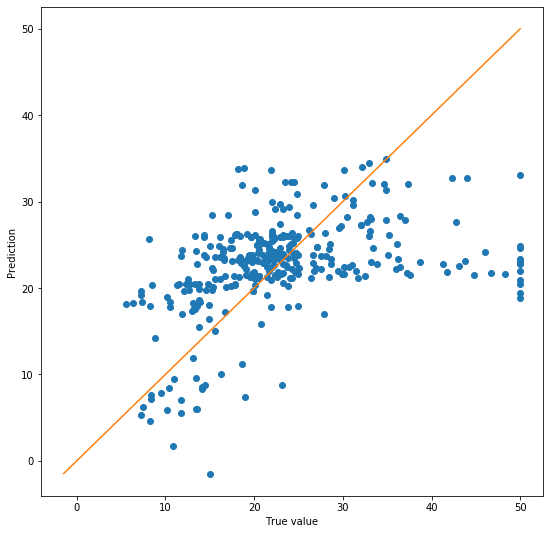

In [0]:
# compare true values and estimates by our model
training_predictions = training_predictions.cpu().data.numpy()

plt.figure(figsize=(9, 9))
plt.plot(training_values, training_predictions, 'o');
plt.plot([np.min(training_predictions), np.max(training_values)], 
         [np.min(training_predictions), np.max(training_values)])
plt.xlabel('True value')
plt.ylabel('Prediction');

In [0]:
# Get predictions for the test sample
with torch.no_grad():
    if torch.cuda.is_available():
        test_predictions = model(Variable(torch.from_numpy(test_points).type(torch.float).cuda())).cpu().data.numpy()
    else:
        test_predictions = model(Variable(torch.from_numpy(test_points))).type(torch.float).data.numpy()

In [0]:
# TODO compare true values and predictions for the test sample


## **Logistic regression with PyTorch**

In [0]:
# Load breast cancer data from sklearn set of datasets
breast_cancer_data = datasets.load_breast_cancer()

points = breast_cancer_data['data']
labels = breast_cancer_data['target'].reshape(-1, 1)
training_points, test_points, training_labels, test_labels = model_selection.train_test_split(
    points, labels, test_size=0.33, random_state=42)

In [0]:
# create a logistic regression class
class logisticRegression(torch.nn.Module):
    def __init__(self, input_dimension, output_dimension):
        super(logisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dimension, output_dimension)

    def forward(self, x):
        out = self.linear(x)
        return out

In [0]:
# initialize object of our class given input and output dimensions
input_dimension = training_points.shape[1]
output_dimension = 1

logistic_regression_model = logisticRegression(input_dimension, output_dimension)

# use GPU to speed up calculations
if torch.cuda.is_available():
    logistic_regression_model.cuda()

In [0]:
# identify what we want to optimize and how
learning_rate = 1e-2

# initialize weights of logistic regression by zeros
torch.nn.init.constant_(logistic_regression_model.linear.weight, 0)

# minimize logistic loss function
criterion = torch.nn.BCEWithLogitsLoss(size_average=True)
# ADAM is an optimization algorithm of our choice
optimizer = torch.optim.Adam(logistic_regression_model.parameters(), lr=learning_rate)

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [0]:
epochs = 2000

# input and output matrices -> tensors
if torch.cuda.is_available():
  inputs = Variable(torch.from_numpy(training_points).type(torch.float).cuda())
  outputs = Variable(torch.from_numpy(training_labels).type(torch.float).cuda())
else:
  inputs = Variable(torch.from_numpy(training_points).type(torch.float))
  outputs = Variable(torch.from_numpy(training_labels).type(torch.float))

for epoch in range(epochs):
  # zero gradients!
  optimizer.zero_grad()

  # predict for training data
  training_predictions = logistic_regression_model(inputs)

  # calculate loss function
  loss_value = criterion(training_predictions, outputs)
  # get gradients
  loss_value.backward()

  # update parameters
  optimizer.step()
  
  if epoch % 100 == 1:
    print('epoch {}, loss {}'.format(epoch, loss_value.item()))

## Estimate quality of our model

Compare to the quality of logistic regression model from sklearn using ROC AUC metric.

In [0]:
# import models
from sklearn import metrics, linear_model

In [0]:
# get predictions
with torch.no_grad():
    if torch.cuda.is_available():
        test_predictions = logistic_regression_model(Variable(torch.from_numpy(test_points).type(torch.float).cuda())).cpu().data.numpy()
    else:
        test_predictions = logistic_regression_model(Variable(torch.from_numpy(test_points))).type(torch.float).data.numpy()

In [0]:
sklearn_logistic_regression_model = linear_model.LogisticRegression()

In [0]:
sklearn_logistic_regression_model.fit(training_points, training_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
sklearn_test_predictions = sklearn_logistic_regression_model.predict_proba(test_points)[:, 1]

In [0]:
# evaluate ROC AUC for two models
metrics.roc_auc_score(test_labels, test_predictions)
metrics.roc_auc_score(test_labels, sklearn_test_predictions)

0.9967928950289873